# Importing Required Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore") 

# Data Prepocessing & Analysis

In [31]:
df = pd.read_csv("Bank_Customer_Data.csv")
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

**Dataframe Summary**

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [33]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [34]:
 df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [35]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [36]:
# exploration of the column with null values

value_counts = df['MINIMUM_PAYMENTS'].value_counts()
value_counts[value_counts == 2].index.tolist()           # mode count is 2

[299.351881]

In [37]:
df['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [38]:
# filling missing values

df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

In [39]:
# dropping columns and duplicate rows

df = df.drop_duplicates()
df.drop(columns=["CUST_ID"],axis=1,inplace=True)

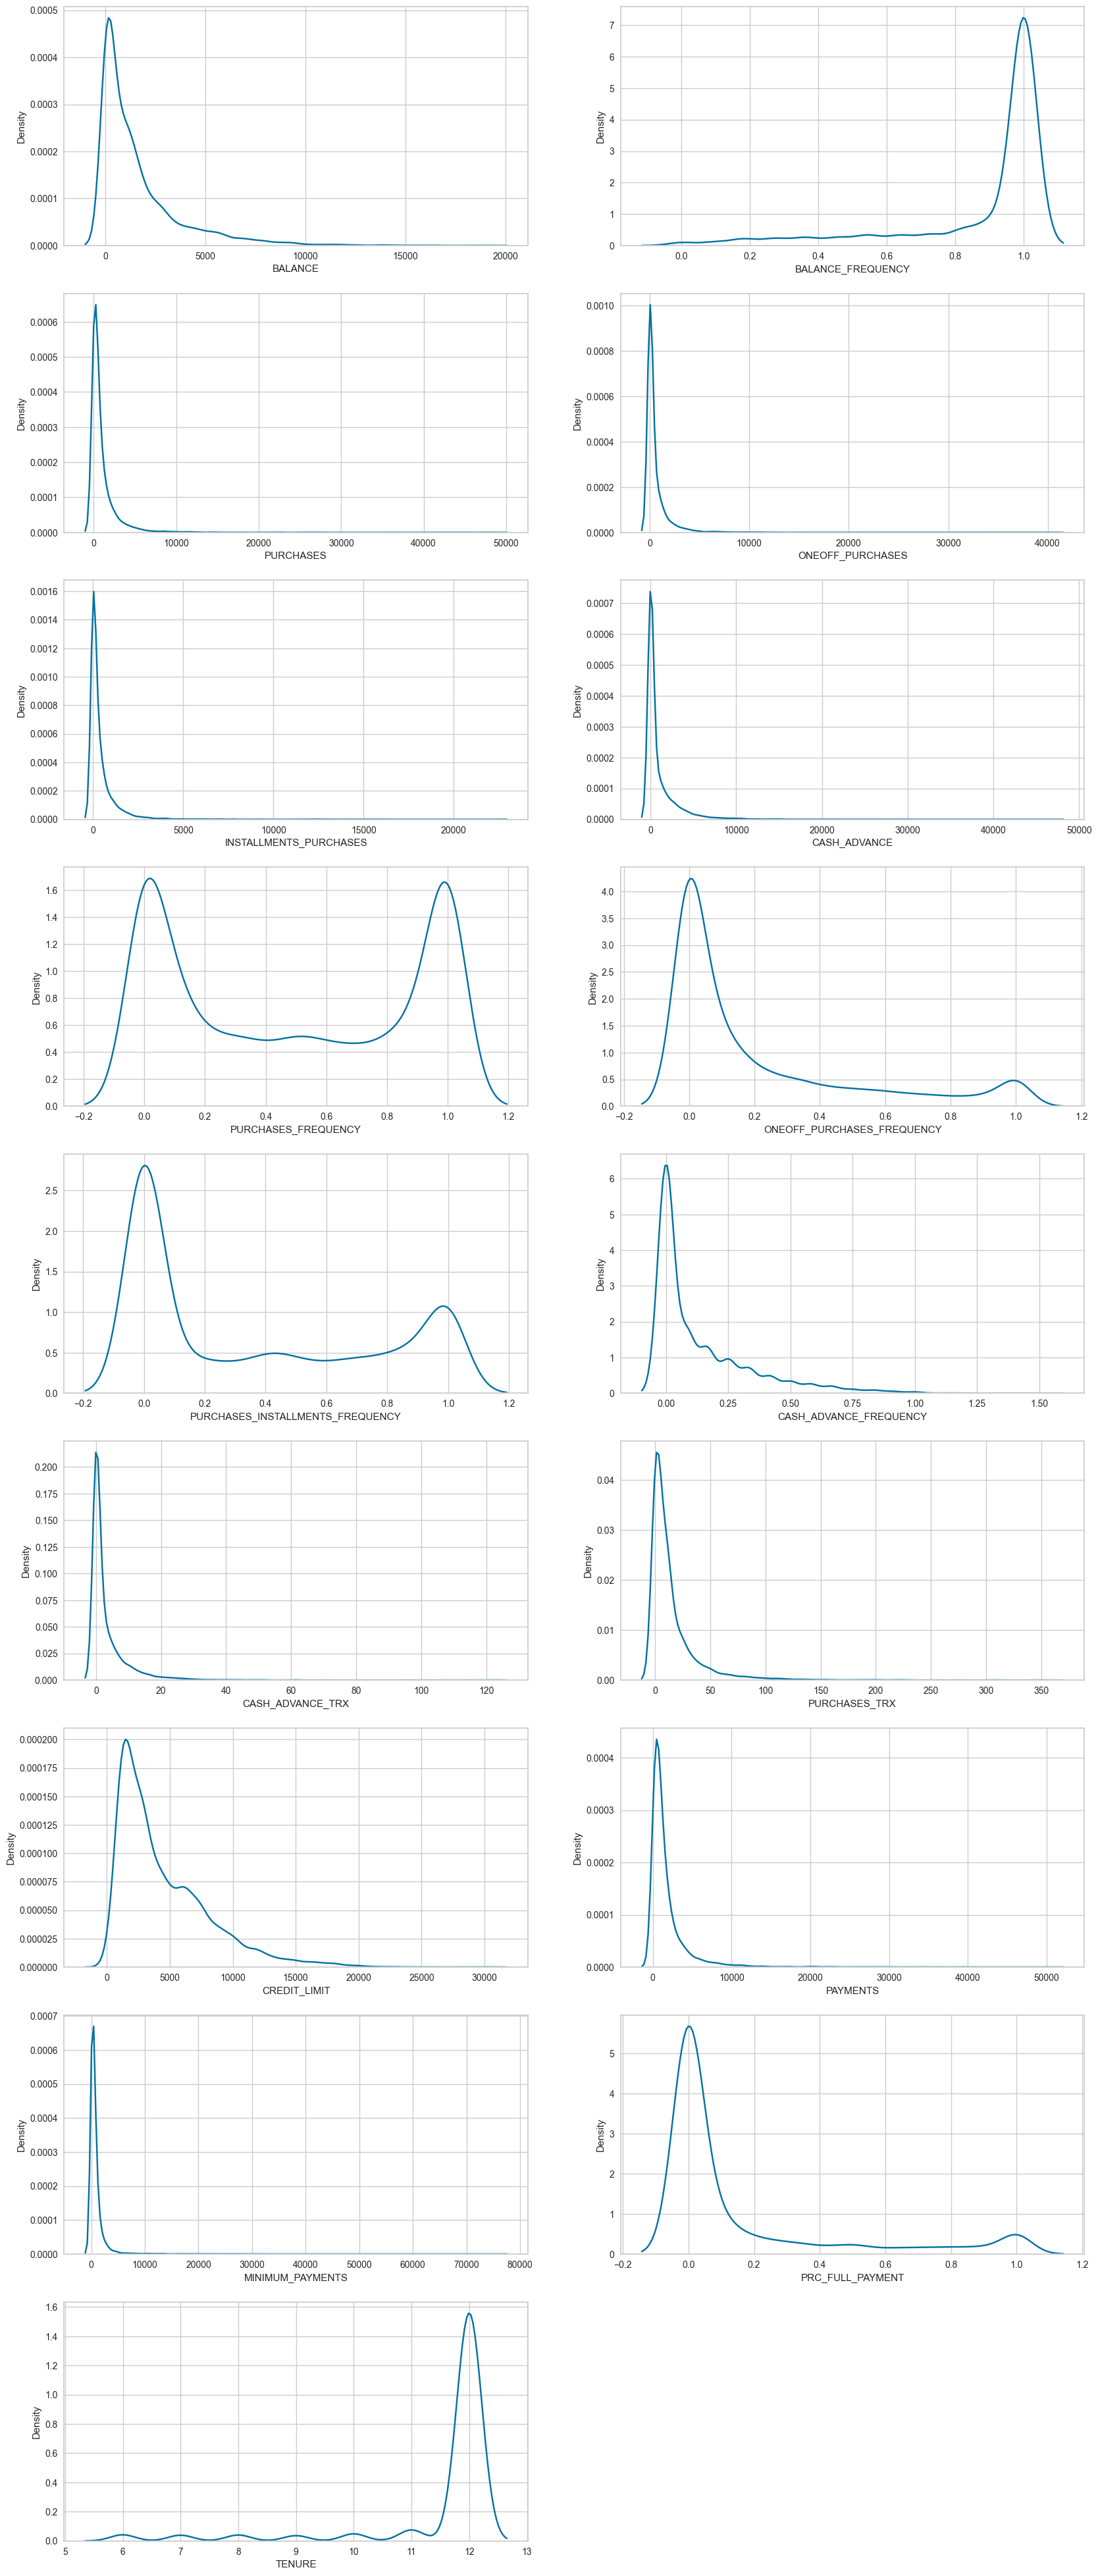

In [40]:
#checking the data distribution within columns

plt.figure(figsize=(20, 50))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
        
plt.show()

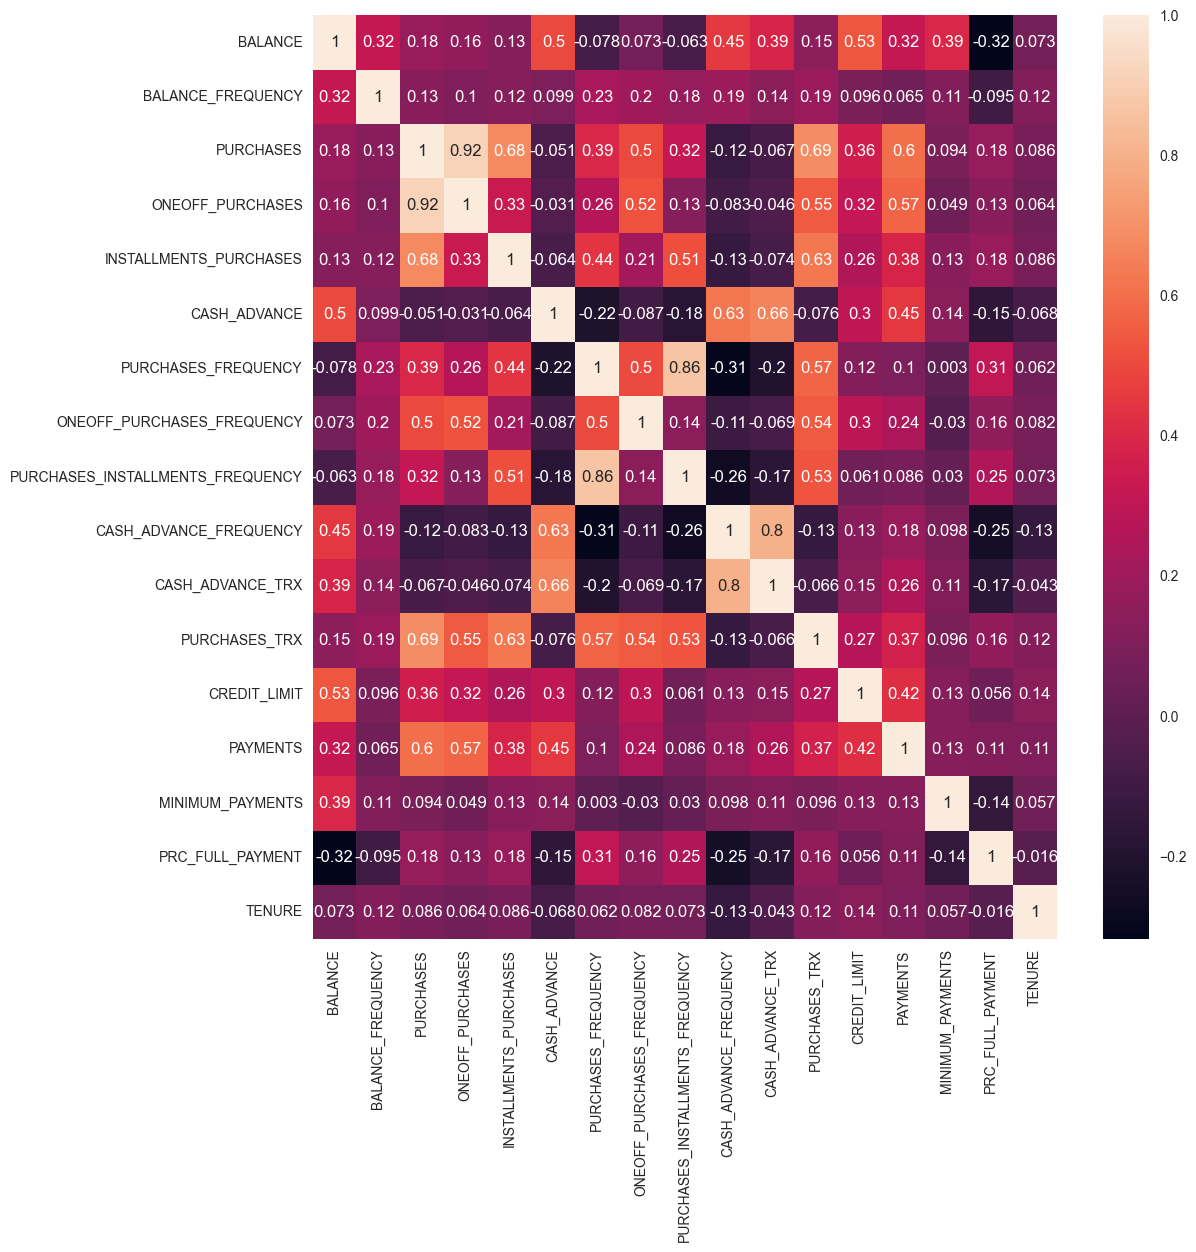

In [41]:
#pearson correlation heatmap

plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

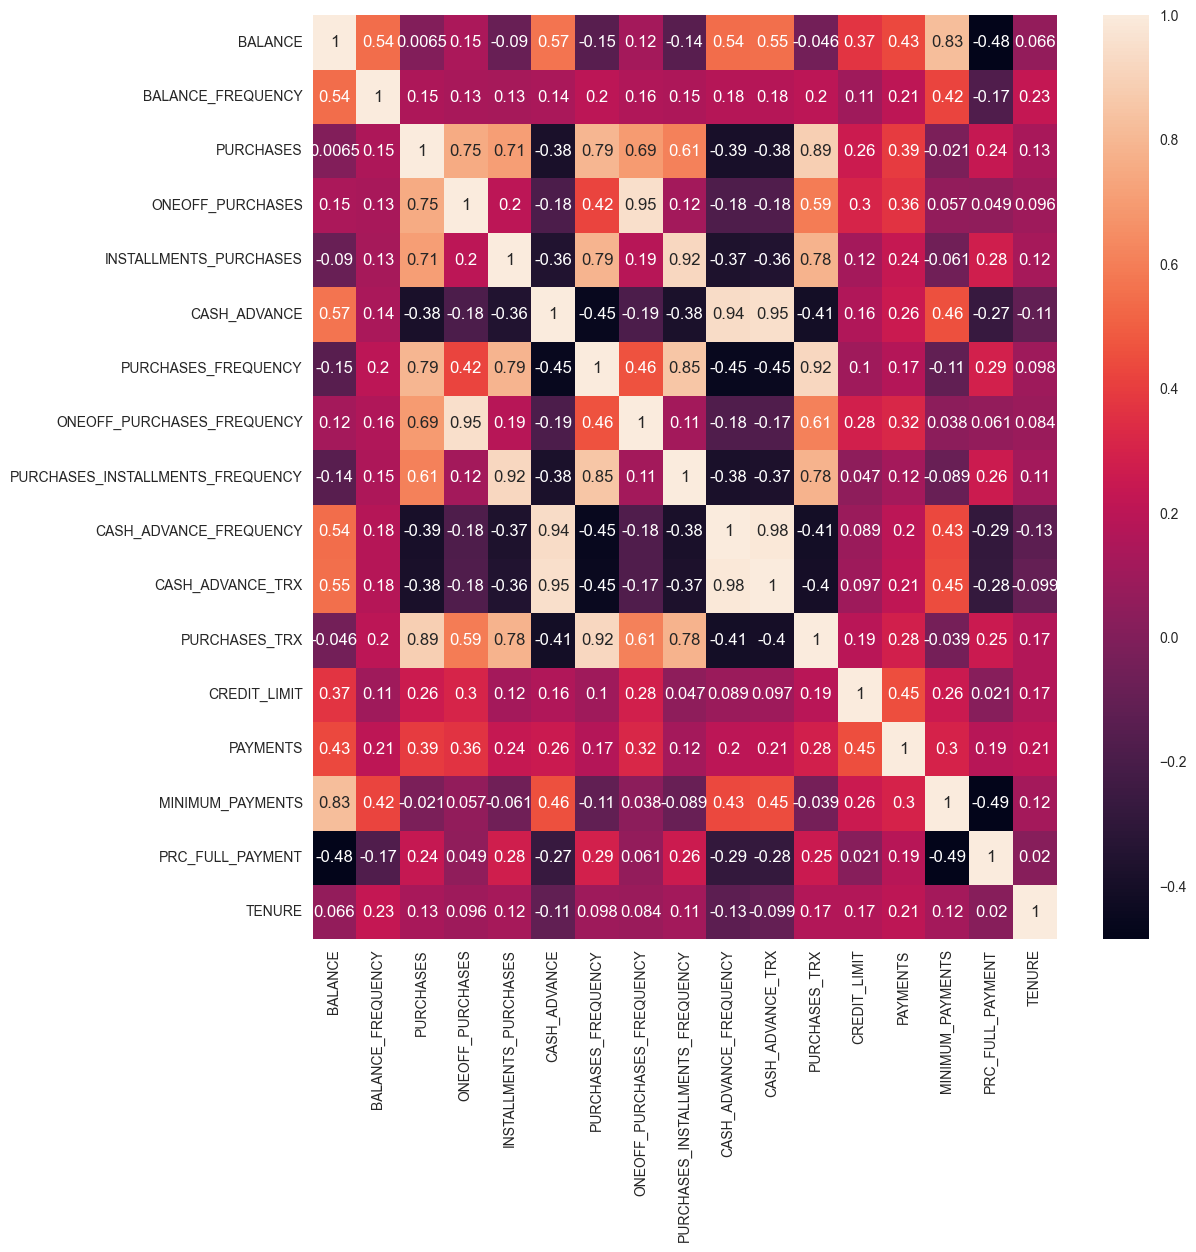

In [42]:
#Spearman correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(method='spearman'), annot=True)
plt.show()

In [43]:
# removing highly correlated columns

df = df.drop(['ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_TRX','CASH_ADVANCE_FREQUENCY','PURCHASES_FREQUENCY'], axis=1)

In [44]:
# Scaling dataframe

scalar=StandardScaler()
scaled_df = scalar.fit_transform(df)

In [45]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

**_**

**Dimensionality Reduction**


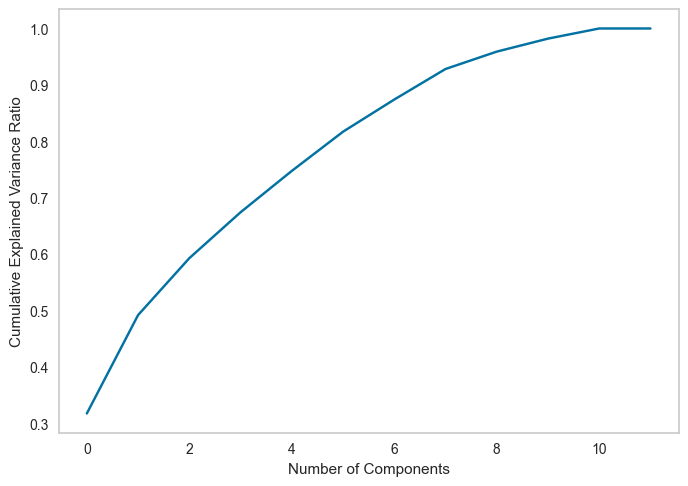

In [46]:
#finding the best PCA component count using elbow method

pca = PCA()
pca.fit(scaled_df)  # X is your data
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid()
plt.show()

In [47]:
#N_components = 7 by considering elbow method and cumulative explained variance ratio (>90%)

pca = PCA(n_components=7)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7"])
pca_df

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7
0    -1.454904 -0.487413 -0.450710 -0.121787 -0.021374  0.647006  0.258071
1     0.331658  2.282707  1.422766 -0.952364 -0.153002 -0.607927  0.586883
2     0.004766  0.548373 -0.638740 -0.418514 -0.351559  0.316591 -0.591123
3    -0.192094  0.048555  0.216828 -0.360961  0.639685  1.127722 -0.692305
4    -1.242446 -0.072034 -0.783445 -0.142311 -0.503479  0.373482  0.451381
...        ...       ...       ...       ...       ...       ...       ...
8945 -1.451176 -1.171307  1.445177  3.174472 -1.281595 -1.772498  0.034908
8946 -1.530002 -0.437138  0.839270  3.718498 -1.254621 -0.636000 -0.240198
8947 -1.741583 -0.932135  1.547825  3.363984 -0.939616 -0.887720 -0.310458
8948 -1.951784 -0.874361  1.595245  3.348651 -0.976795 -0.828665 -0.155046
8949 -1.145232 -0.950389  1.609653  3.726089 -0.744122  0.283118 -0.634820

[8950 rows x 7 columns]

In [48]:
# explained variance ratio of PCA components

pca.explained_variance_ratio_

array([0.31782794, 0.17432744, 0.1008349 , 0.08133883, 0.07326342,
       0.06948804, 0.05701571])

In [49]:
# # getting best 3 PCA components by considering explained variances

# pca_df = pca_df[["PCA1","PCA2","PCA3"]]
# scaled_df =pca_df

# Model selection & Hyperparameter tuning


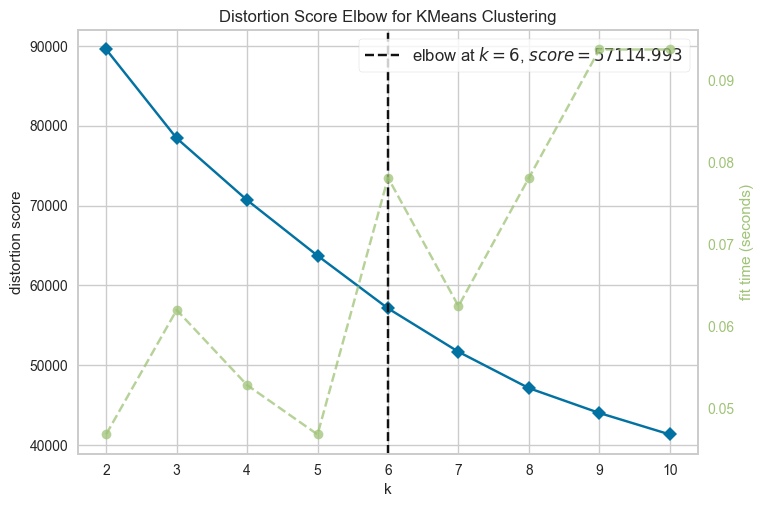

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
# Elbow Method for K means based on distortion score

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11), timings= True)
visualizer.fit(scaled_df)      
visualizer.show()       

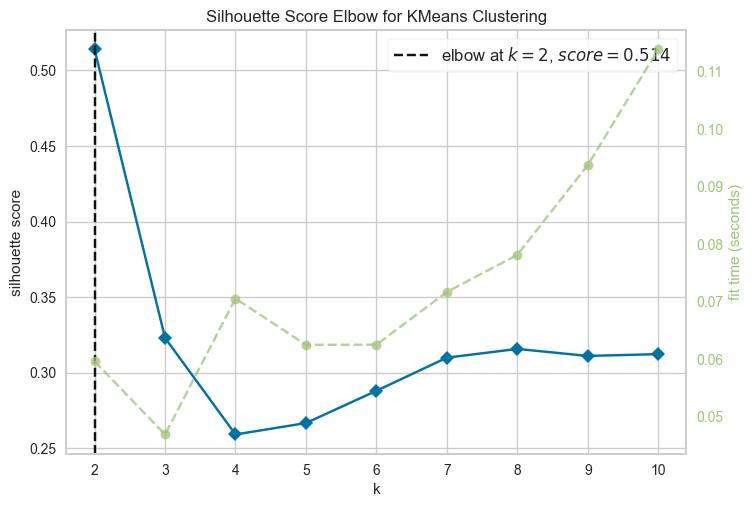

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [51]:
# Elbow Method for K means based on silhouette score

from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11),metric='silhouette', timings= True)
visualizer.fit(scaled_df)    
visualizer.show()    

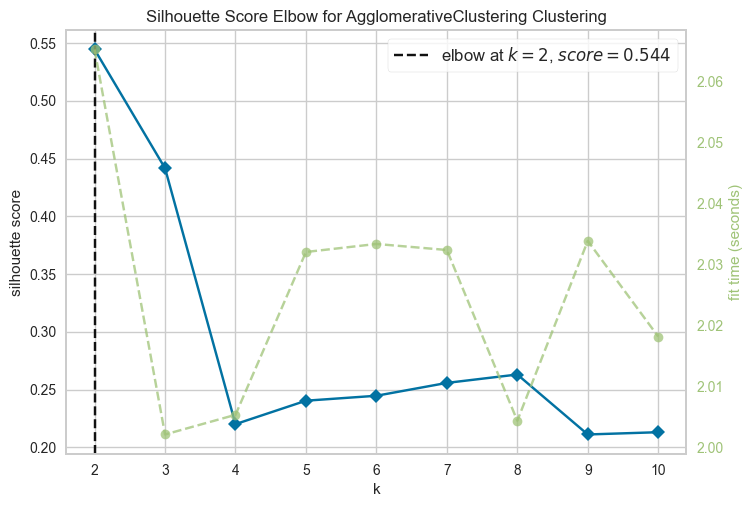

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [52]:
# Elbow Method for Agglomerative clustering based on silhouette score

from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,11),metric='silhouette', timings= True)
visualizer.fit(scaled_df)     
visualizer.show()  

In [53]:
# scaled_df = pca_df

# cluster_model = KMeans(3)#AgglomerativeClustering(n_clusters=3)#KMeans(3) #
# cluster_model.fit_predict(scaled_df)
# cluster_df= pd.concat([scaled_df,pd.DataFrame({'Cluster':cluster_model.labels_})],axis=1)

# #cluster_df = pd.concat([df,pd.DataFrame({'Cluster':cluster_model.labels_})],axis=1)

# cluster_1_df = cluster_df[cluster_df["Cluster"]==0]
# cluster_2_df = cluster_df[cluster_df["Cluster"]==1]
# cluster_3_df = cluster_df[cluster_df["Cluster"]==2]


# X = cluster_df.drop(['Cluster'],axis=1)
# y= cluster_df[['Cluster']]
# X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)


# from xgboost import XGBClassifier
# model = XGBClassifier()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# print(metrics.confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

# from sklearn.metrics import normalized_mutual_info_score
# print("Normalized Mutual Information:", normalized_mutual_info_score(y_test.values.flatten().tolist(), y_pred)) #higher better


# from sklearn.metrics import calinski_harabasz_score
# print("Calinski-Harabasz Score:", calinski_harabasz_score(X_test, y_pred)) #higher better

# from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
# homogeneity = homogeneity_score(y_test.values.flatten().tolist(), y_pred)  # ground_truth_labels are true labels
# completeness = completeness_score(y_test.values.flatten().tolist(), y_pred)
# v_measure = v_measure_score(y_test.values.flatten().tolist(), y_pred)
# print("Homogeneity Score:", homogeneity)
# print("Completeness Score:", completeness)
# print("V-Measure Score:", v_measure)


In [54]:
# Applying the selected model

cluster_model = KMeans(3)#AgglomerativeClustering(n_clusters=3)#KMeans(3) #
cluster_model.fit_predict(pca_df)
cluster_df= pd.concat([pca_df,pd.DataFrame({'cluster':cluster_model.labels_})],axis=1)

# visualization of the clustered dataframe

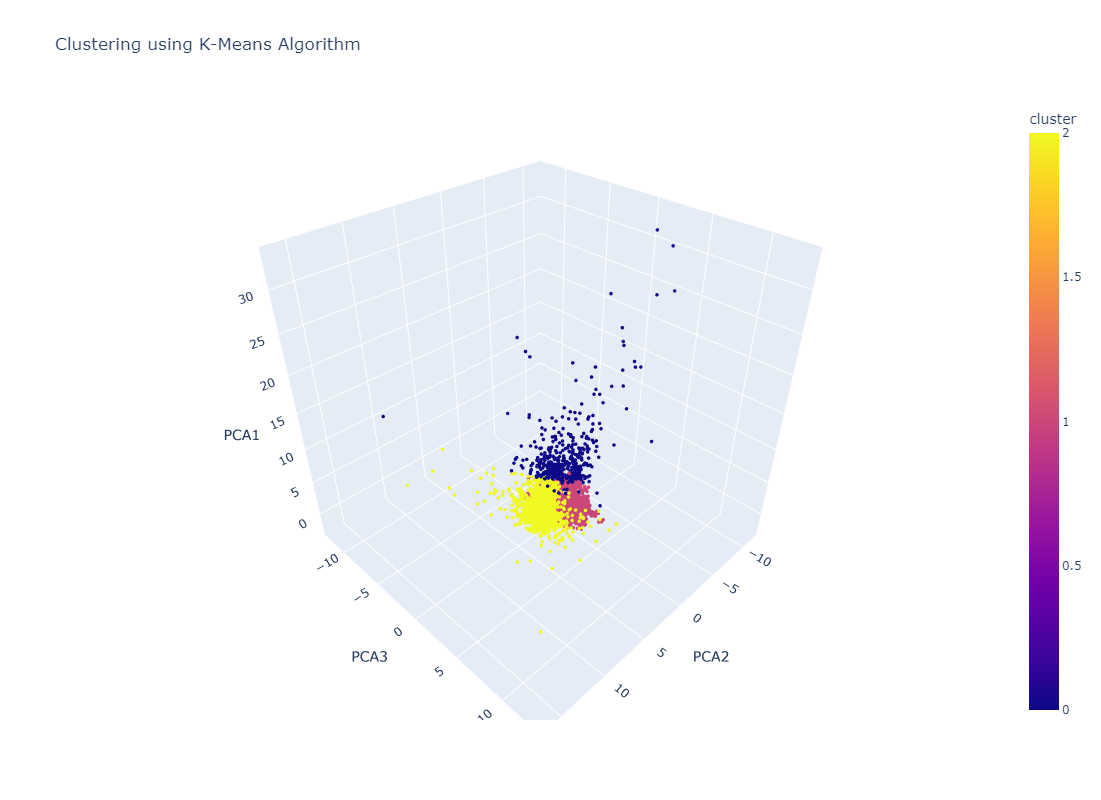

In [55]:
# 3d visualuzation of clustered data

fig = px.scatter_3d(
    cluster_df,
    x="PCA2",
    y="PCA3",
    z="PCA1",
    color="cluster",
    color_discrete_sequence=['red', 'green', 'blue', 'black'],  # Specify colors
    title="Clustering using K-Means Algorithm"
)

fig.update_layout(scene=dict(aspectmode='cube'),
    width=800, 
    height=800 )

fig.update_traces(marker=dict(size=2))

fig.show()


In [56]:
# add clusters labels to cluster_df

cluster_df = pd.concat([pca_df,pd.DataFrame({'cluster':cluster_model.labels_})],axis=1)

In [57]:
cluster_1_df = cluster_df[cluster_df["cluster"]==0]
cluster_2_df = cluster_df[cluster_df["cluster"]==1]
cluster_3_df = cluster_df[cluster_df["cluster"]==2]

<Axes: xlabel='cluster', ylabel='count'>

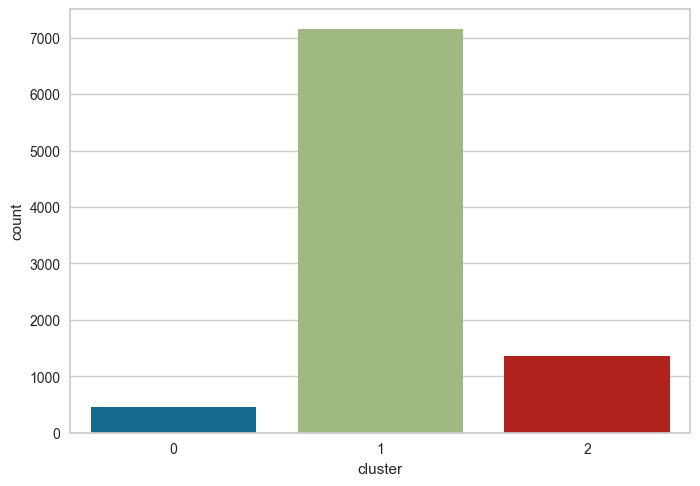

In [58]:
#Graph of cluster point distributions

sns.countplot(x='cluster', data=cluster_df)


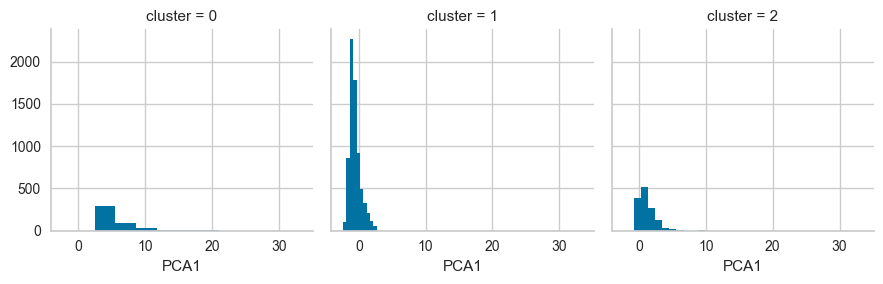

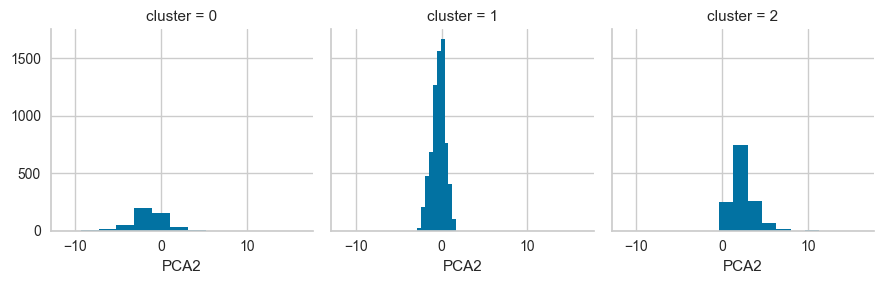

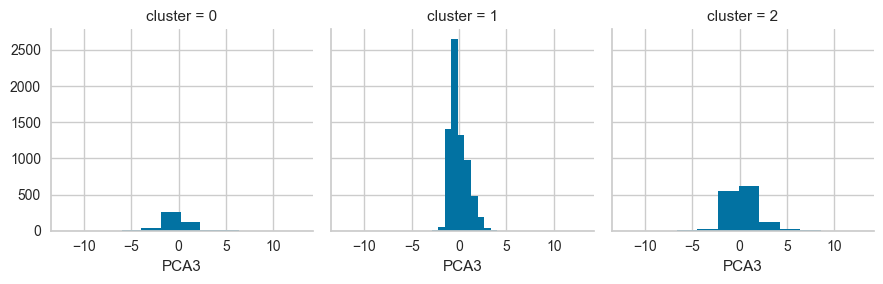

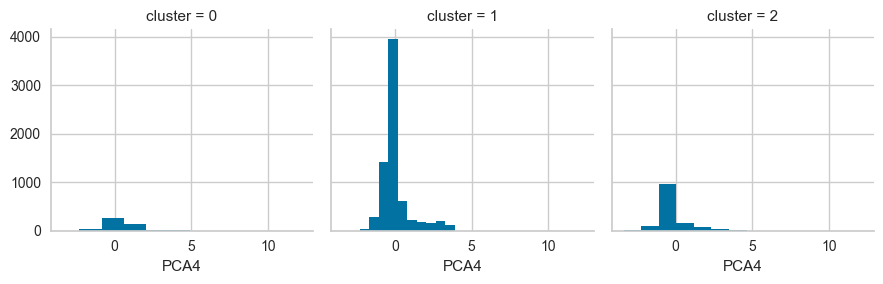

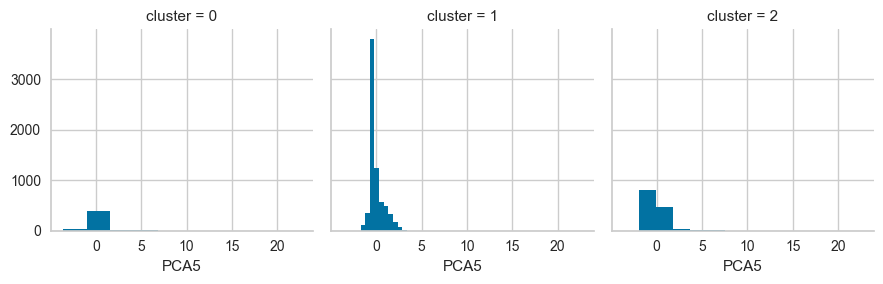

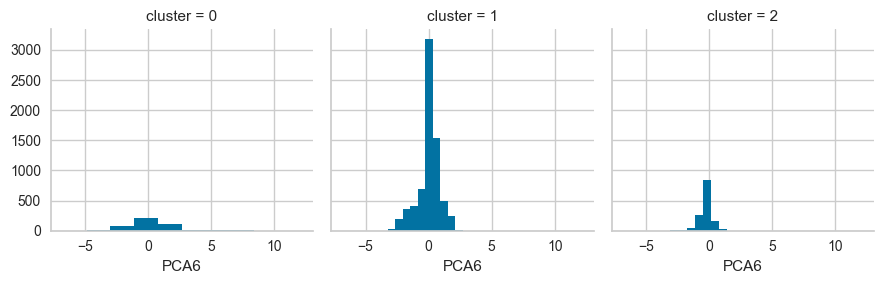

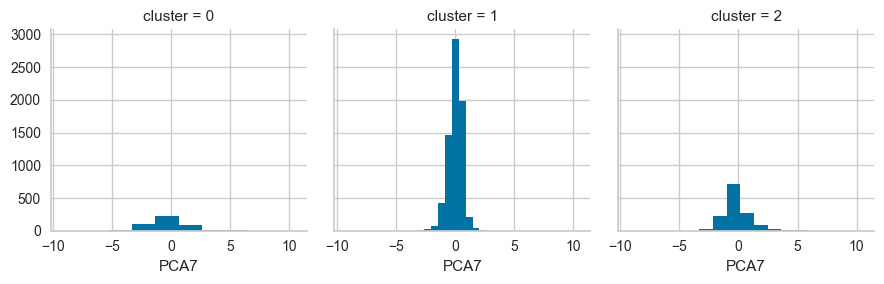

In [59]:
for c in cluster_df.drop(['cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='cluster')
    grid= grid.map(plt.hist, c)
plt.show()

# Saving the kmeans clustering model and the data with cluster label

In [60]:
#Saving models

import joblib
joblib.dump(cluster_model, "kmeans_model.pkl")
joblib.dump(scalar,"std_scaler.pkl")
joblib.dump(pca, "pca_model.pkl")

['pca_model.pkl']

In [61]:
scaler = joblib.load('std_scaler.pkl')
scaler.transform([[1,2,3,4,5,6,7,8,9,10,11,12]])

array([[-0.75115937,  4.73943871, -0.46814773, -0.35452409, -0.44904702,
        -0.46392439, -0.31017668, -1.23307998, -0.59557935, -0.36654023,
        37.0834911 ,  0.36067954]])

In [62]:
#Saving clustered data

cluster_df_ = pd.concat([df,pd.DataFrame({'cluster':cluster_model.labels_})],axis=1)
cluster_df_.to_csv("Clustered_Data.csv")

In [63]:

cluster_df_

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_TRX  CREDIT_LIMIT  \
0                      95.40      0.000000              2        1000.0   
1                       0.00   6442.945483              0        7000.0   
2                       0.00      0.000000             12        7500.0   
3                       0.00    205.788017              1        7500.0   
4                       0.00      0.000000              1        1200.0   
...                      ...           ...            ...           ...   
8945                  291.12      0.000000              6        1000.0   
8946                  300.00      0.000000              6        1000.0   
8947                  144.40      0.000000              5        1000.0   
8948                    0.00     36.558778              0         500.0   
8949                    0.00    127.040008             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12        1  
1     4103.032597       1072.340217          0.222222      12        2  
2      622.066742        627.284787          0.000000      12        1  
3        0.000000        864.206542          0.000000      12        1  
4      678.334763        244.791237          0.000000      12        1  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000       6        1  
8946   275.861322        864.206542          0.000000       6        1  
8947    81.270775         82.418369          0.250000       6        1  
8948    52.549959         55.755628          0.250000       6        1  
8949    63.165404         88.288956          0.000000       6        1  

[8950 rows x 13 columns]

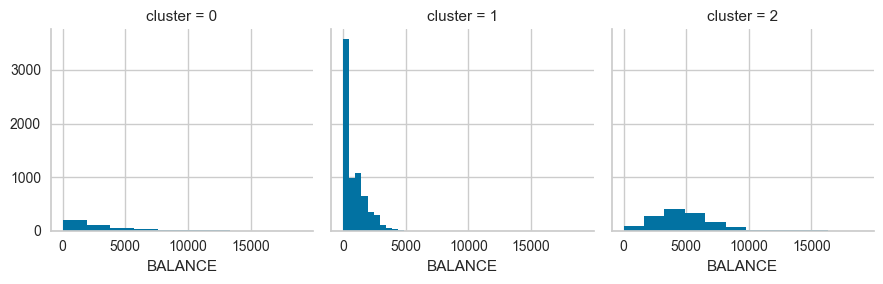

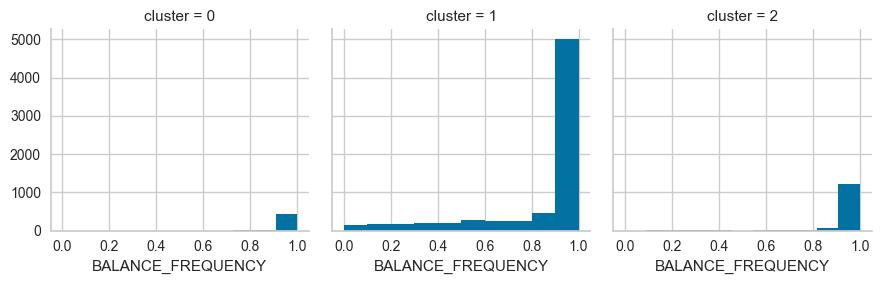

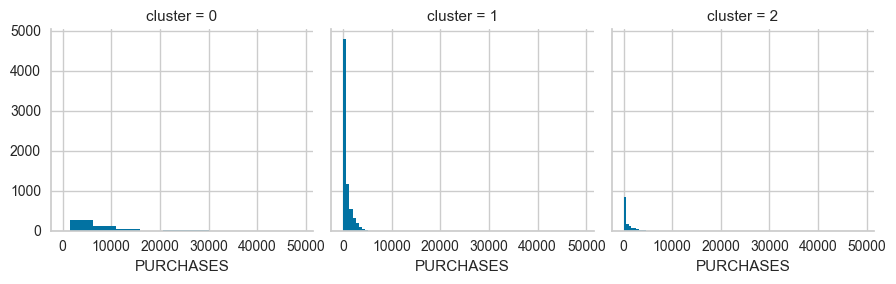

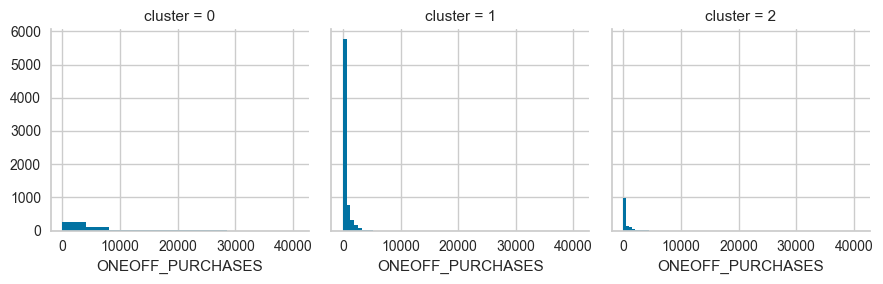

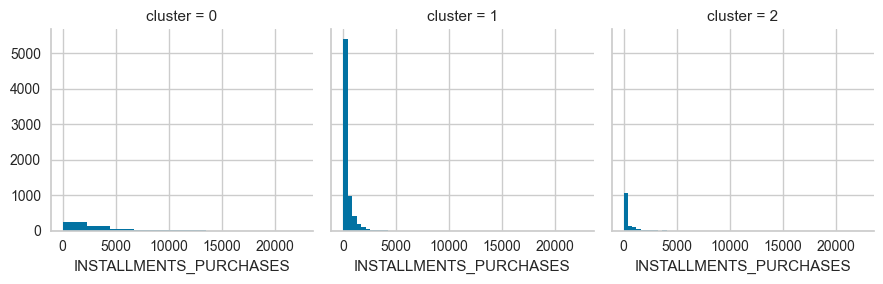

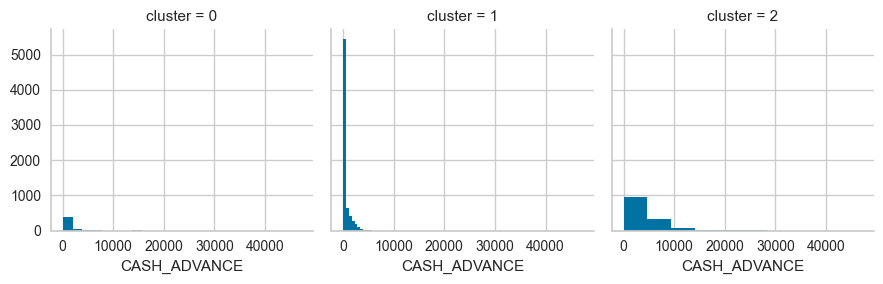

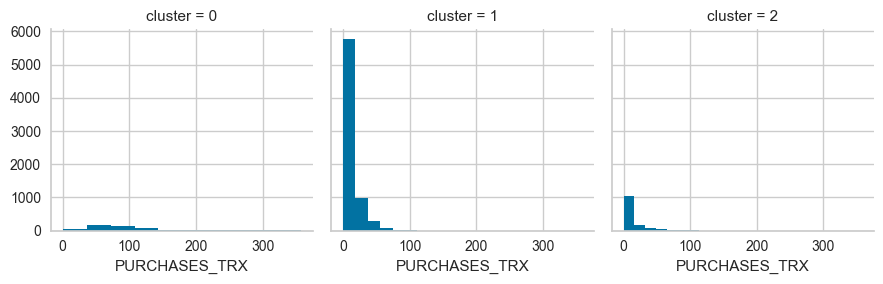

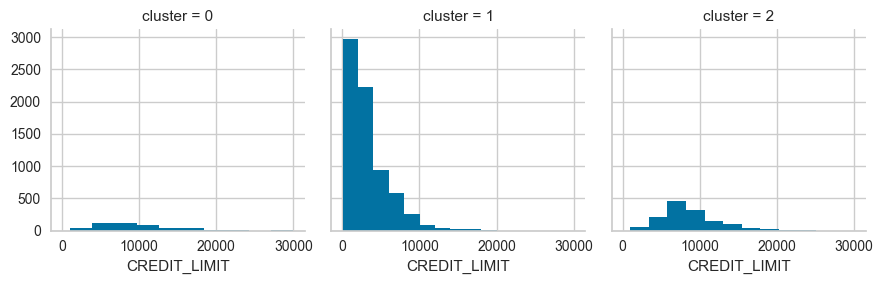

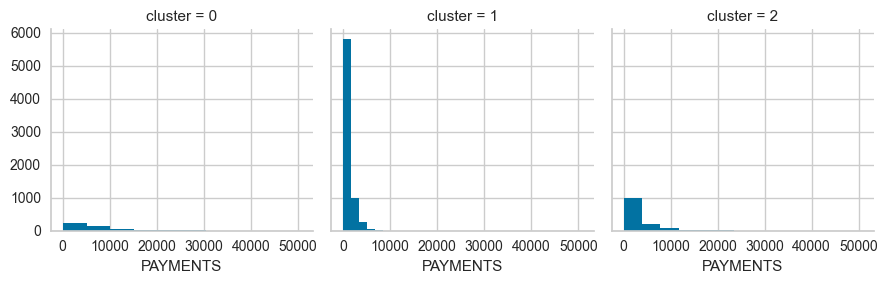

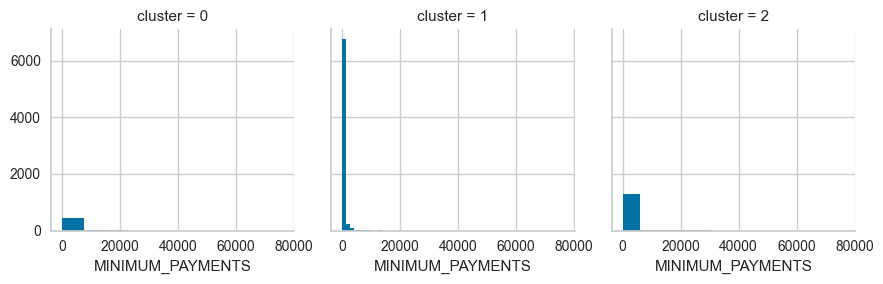

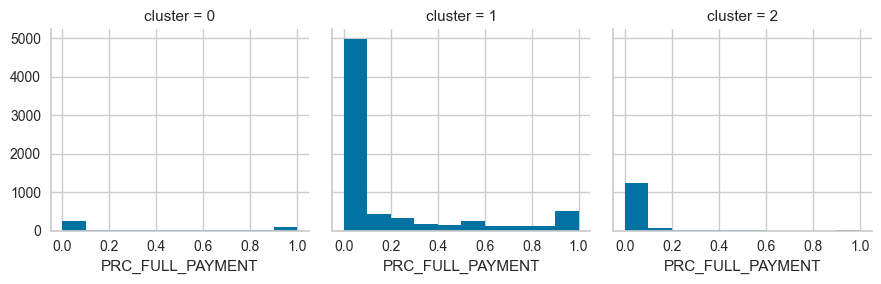

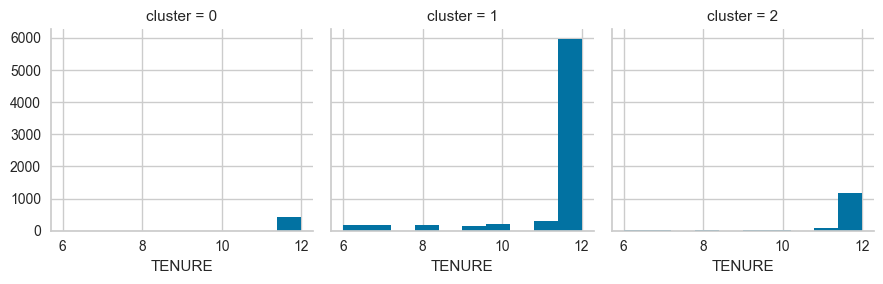

In [65]:
for c in cluster_df_.drop(['cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df_, col='cluster')
    grid= grid.map(plt.hist, c)
plt.show()

# Training and Testing the model accuracy using XGBClassifier

In [74]:
#train test split

X = cluster_df.drop(['cluster'],axis=1)
y= cluster_df[['cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)


In [75]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [76]:
#Confusion_Matrix

print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2135    0    9]
 [   0  131    5]
 [  11    2  392]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2144
           1       0.98      0.96      0.97       136
           2       0.97      0.97      0.97       405

    accuracy                           0.99      2685
   macro avg       0.98      0.98      0.98      2685
weighted avg       0.99      0.99      0.99      2685



In [77]:
import pickle
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))


loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9899441340782122 % Acuuracy
